# Лабораторная работа № 9.


In [ ]:
pip install opencv-python-headless


1. Заснять на веб-камеру или скачать с интернета цветное видео (файл_1) длинной не менее 50 с, в котором человек производит какие-либо движения (допустимы даже минимальные: необходимо, чтобы его лицо не было зафиксировано в одном положении в течение видео) и при этом большую часть времени смотрит в объектив камеры (но не все время, т.е. человек может отворачиваться, посмотреть в другую сторону). Необходимо к каждому кадру видеопотока применять различные преобразования, так что в видео:
    * [0c; 5c): кадр без изменений
    * [6c; 10c): размытие с квадратной матрицей из 1 размером 3,
    * [10c; 15c): размытие с квадратной матрицей из 1 размером 5,
    * [15c; 20c): размытие с квадратной матрицей из 1 размером 9.
    * [20c; 25c): размытие с квадратной матрицей из 1 размером 15.
    * [25c; 30c): обнулить цветовой канал первый (B)
    * [30c; 35c): обнулить второй цветовой канал (G)
    * [35c; 40c): обнулить второй цветовой канал (R)
    * [40c; 45с): применить эрозию с ядром размером 3
    * [45c; 50с): применить эрозию с ядром размером 5
Записать сохранить модифицированную видеозапись в файл2.


In [ ]:
import cv2

# Открыть видеофайл
video_capture = cv2.VideoCapture('video_file_1.mkv')

# Получить FPS (кадры в секунду) видео
fps = video_capture.get(cv2.CAP_PROP_FPS)

# Получить размеры кадра
frame_width = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Создать объект для записи видео в файл
fourcc = cv2.VideoWriter_fourcc(*'XVID')
video_writer = cv2.VideoWriter('video_file_2.avi', fourcc, fps, (frame_width, frame_height))

# Цикл по каждому кадру видео
while True:
    ret, frame = video_capture.read()

    if not ret:
        break

    # Получить текущее время в кадре (в секундах)
    current_time = video_capture.get(cv2.CAP_PROP_POS_MSEC) / 1000

    # Применить различные преобразования в соответствии с временными интервалами
    if 0 <= current_time < 5:
        # Никаких изменений
        pass
    elif 5 <= current_time < 10:
        # Размытие с квадратной матрицей 3x3
        frame = cv2.blur(frame, (3, 3))
    elif 10 <= current_time < 15:
        # Размытие с квадратной матрицей 5x5
        frame = cv2.blur(frame, (5, 5))
    elif 15 <= current_time < 20:
        # Размытие с квадратной матрицей 9x9
        frame = cv2.blur(frame, (9, 9))
    elif 20 <= current_time < 25:
        # Размытие с квадратной матрицей 15x15
        frame = cv2.blur(frame, (15, 15))
    elif 25 <= current_time < 30:
        # Обнулить канал B
        frame[:, :, 0] = 0
    elif 30 <= current_time < 35:
        # Обнулить канал G
        frame[:, :, 1] = 0
    elif 35 <= current_time < 40:
        # Обнулить канал R
        frame[:, :, 2] = 0
    elif 40 <= current_time < 45:
        # Применить эрозию с ядром размером 3x3
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
        frame = cv2.erode(frame, kernel)
    elif 45 <= current_time < 50:
        # Применить эрозию с ядром размером 5x5
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
        frame = cv2.erode(frame, kernel)

    # Записать модифицированный кадр в видеофайл
    video_writer.write(frame)

    # Отобразить модифицированный кадр
    cv2.imshow('Modified Frame', frame)

    # Прервать выполнение при нажатии клавиши 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Освободить ресурсы
video_capture.release()
video_writer.release()
cv2.destroyAllWindows()


SyntaxError: invalid syntax (<ipython-input-1-cc6fb2d17a3c>, line 1)

2. Написать программу, которая к видео из файла2 применяет признаки Хаара, детектирует лица и обводит их в прямоугольную рамку. Записать полученное видео в файл3. Сделать выводы о том насколько ухудшение качества видеопотока влияет на определение лиц с помощью признаков Хаара.

In [ ]:
import cv2

# Загрузить видеофайл
video_capture = cv2.VideoCapture('video_file_2.avi')

# Получить FPS (кадры в секунду) видео
fps = video_capture.get(cv2.CAP_PROP_FPS)

# Получить размеры кадра
frame_width = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Создать объект для записи видео в файл
fourcc = cv2.VideoWriter_fourcc(*'XVID')
video_writer = cv2.VideoWriter('video_file_3.avi', fourcc, fps, (frame_width, frame_height))

# Создать детектор лиц с помощью каскадов Хаара
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


# Цикл по каждому кадру видео
while True:
    ret, frame = video_capture.read()

    if not ret:
        break

    # Преобразовать кадр в оттенки серого
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Обнаружить лица на кадре
    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Обвести лица в прямоугольную рамку
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Записать модифицированный кадр в видеофайл
    video_writer.write(frame)

    # Отобразить модифицированный кадр
    cv2.imshow('Detected Faces', frame)

    # Прервать выполнение при нажатии клавиши 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Освободить ресурсы
video_capture.release()
video_writer.release()
cv2.destroyAllWindows()



SyntaxError: invalid syntax (<ipython-input-2-195ee9c252b6>, line 1)

# Лабораторная работа № 10.


Подготовка.
Создать три картинки 800х600px с белым фоном и разместить на них непересекающиеся: 100 одинаковых квадратов и 100 одинаковых прямоугольных равнобедренных треугольников (катет равен стороне квадрата) другого цвета следующим образом:

* 1-й рисунок) квадраты и треугольники образуют две непересекающиеся области, которые  визуально легко разделить прямой линией,




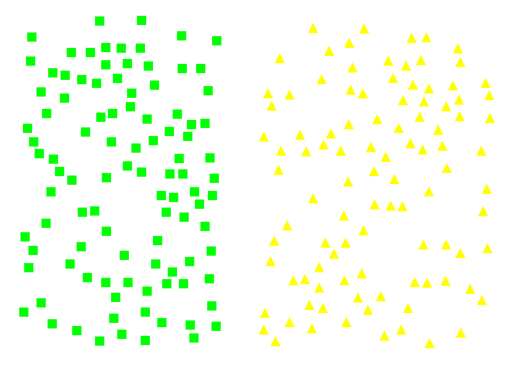

In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Создание изображения с белым фоном
def create_image():
    return np.ones((600, 800, 3)) * 255

# Функция для создания квадрата
def create_square(image, color, x, y, size):
    image[y:y+size, x:x+size] = color
    return image

# Функция для создания треугольника
def create_triangle(image, color, x, y, size):
    triangle_points = np.array([[x + size // 2, y],
                                [x, y + size],
                                [x + size, y + size]])
    cv2.fillPoly(image, [triangle_points], color)
    return image

# Первое изображение
image1 = create_image()
color_square1 = (0, 255, 0)  # Зеленый квадрат
color_triangle1 = (255, 255, 0)  # Желтый треугольник

squares = []
triangles = []

# Создание квадратов и треугольников
for i in range(100):
    size = 15  # Размер фигур
    x_square = np.random.randint(10, 350 - size - 3)  # Случайная координата X для квадрата с учетом отступа
    y_square = np.random.randint(10, 550 - size - 3)  # Случайная координата Y для квадрата с учетом отступа
    x_triangle = np.random.randint(400 + 3, 790 - size)  # Случайная координата X для треугольника
    y_triangle = np.random.randint(10, 550 - size)  # Случайная координата Y для треугольника

    # Проверяем, чтобы новый квадрат не пересекался с уже существующими квадратами
    if i > 0:
        while any(abs(x_square - sq[0]) <= size + 3 and abs(y_square - sq[1]) <= size + 3 for sq in squares):
            x_square = np.random.randint(10, 350 - size - 3)
            y_square = np.random.randint(10, 550 - size - 3)

    # Проверяем, чтобы новый треугольник не пересекался с уже существующими треугольниками
    if i > 0:
        while any(abs(x_triangle - tr[0]) <= size + 2 and abs(y_triangle - tr[1]) <= size + 2 for tr in triangles):
            x_triangle = np.random.randint(400, 790 - size - 2)
            y_triangle = np.random.randint(10, 550 - size - 2)

    squares.append((x_square, y_square))
    image1 = create_square(image1, color_square1, x_square, y_square, size)
    triangles.append((x_triangle, y_triangle))
    image1 = create_triangle(image1, color_triangle1, x_triangle, y_triangle, size)



# Сохранение изображения
cv2.imwrite('image1.png', image1)
# Визуализация первого изображения
plt.imshow(image1.astype(np.uint8))
plt.axis('off')
plt.show()


* 2-й рисунок) квадраты и треугольники образуют две непересекающиеся области, которые  разделяются прямой линией, при этом достаточно большое фигур обоих типов близки к этой линии,


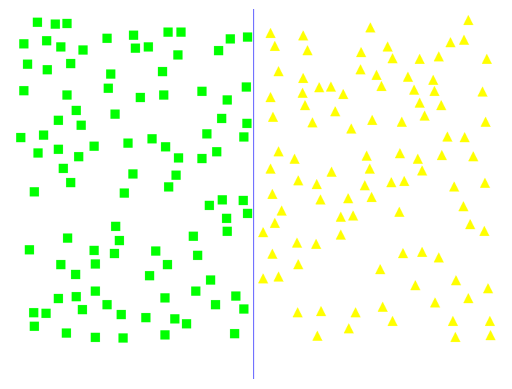

In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Создание изображения с белым фоном
def create_image():
    return np.ones((600, 800, 3)) * 255

# Функция для создания квадрата
def create_square(image, color, x, y, size):
    image[y:y+size, x:x+size] = color
    return image

# Функция для создания треугольника
def create_triangle(image, color, x, y, size):
    triangle_points = np.array([[x + size // 2, y],
                                [x, y + size],
                                [x + size, y + size]])
    cv2.fillPoly(image, [triangle_points], color)
    return image

# Первое изображение
image2 = create_image()
color_square1 = (0, 255, 0)  # Зеленый квадрат
color_triangle1 = (255, 255, 0)  # Желтый треугольник
line_color = (0, 0, 255)  # Синий цвет линии

squares = []
triangles = []

# Создание квадратов и треугольников
for i in range(100):
    size = 15  # Размер фигур
    x_square = np.random.randint(10, 400 - size - 3)  # Случайная координата X для квадрата с учетом отступа
    y_square = np.random.randint(10, 550 - size - 3)  # Случайная координата Y для квадрата с учетом отступа
    x_triangle = np.random.randint(400 + 1, 790 - size)  # Случайная координата X для треугольника
    y_triangle = np.random.randint(10, 550 - size)  # Случайная координата Y для треугольника

    # Проверяем, чтобы новый квадрат не пересекался с уже существующими квадратами
    if i > 0:
        while any(abs(x_square - sq[0]) <= size + 3 and abs(y_square - sq[1]) <= size + 3 for sq in squares):
            x_square = np.random.randint(10, 400 - size - 3)
            y_square = np.random.randint(10, 550 - size - 3)

    # Проверяем, чтобы новый треугольник не пересекался с уже существующими треугольниками
    if i > 0:
        while any(abs(x_triangle - tr[0]) <= size + 2 and abs(y_triangle - tr[1]) <= size + 2 for tr in triangles):
            x_triangle = np.random.randint(400, 790 - size - 2)
            y_triangle = np.random.randint(10, 550 - size - 2)

    squares.append((x_square, y_square))
    image2 = create_square(image2, color_square1, x_square, y_square, size)
    triangles.append((x_triangle, y_triangle))
    image2 = create_triangle(image2, color_triangle1, x_triangle, y_triangle, size)

# Рисуем прямую синей линию для разделения квадратов и треугольников
cv2.line(image2, (395, 0), (395, 600), line_color, thickness=1)

# Сохранение изображения
cv2.imwrite('image2.png', image2)
# Визуализация первого изображения
plt.imshow(image2.astype(np.uint8))
plt.axis('off')
plt.show()




* 3-й рисунок) квадраты и треугольники образуют две пересекающиеся области, при этом в небольшом пересечении этих областей находится 6 фигур одного типа и 3 фигур другого типа. Остальные фигуры легко визуального разделяются прямой на две непересекающиеся области.

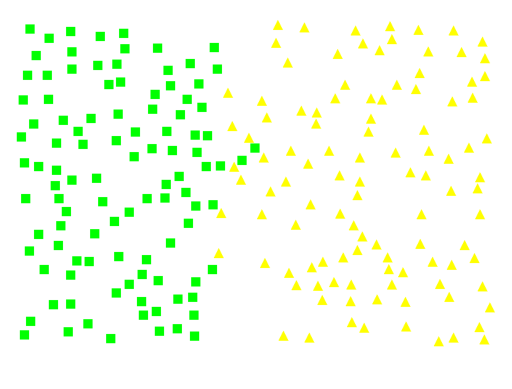

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Создание изображения с белым фоном
def create_image():
    return np.ones((600, 800, 3)) * 255

# Функция для создания квадрата
def create_square(image, color, x, y, size):
    image[y:y+size, x:x+size] = color
    return image

# Функция для создания треугольника
def create_triangle(image, color, x, y, size):
    triangle_points = np.array([[x + size // 2, y],
                                [x, y + size],
                                [x + size, y + size]])
    cv2.fillPoly(image, [triangle_points], color)
    return image


# Третье изображение
image3 = create_image()
color_square3 = (0, 255, 0)  # Зеленый квадрат
color_triangle3 = (255, 255, 0)  # Желтый треугольник


squares = []
triangles = []

# Создание квадратов и треугольников
for i in range(100):
    size = 15  # Размер фигур
    x_square = np.random.randint(10, 320 - size - 3)  # Случайная координата X для квадрата с учетом отступа
    y_square = np.random.randint(10, 550 - size - 3)  # Случайная координата Y для квадрата с учетом отступа
    x_triangle = np.random.randint(420 + 3, 790 - size)  # Случайная координата X для треугольника
    y_triangle = np.random.randint(10, 550 - size)  # Случайная координата Y для треугольника

    # Проверяем, чтобы новый квадрат не пересекался с уже существующими квадратами
    if i > 0:
        while any(abs(x_square - sq[0]) <= size + 3 and abs(y_square - sq[1]) <= size + 3 for sq in squares):
            x_square = np.random.randint(10, 350 - size - 3)
            y_square = np.random.randint(10, 550 - size - 3)

    # Проверяем, чтобы новый треугольник не пересекался с уже существующими треугольниками
    if i > 0:
        while any(abs(x_triangle - tr[0]) <= size + 2 and abs(y_triangle - tr[1]) <= size + 2 for tr in triangles):
            x_triangle = np.random.randint(400, 790 - size - 2)
            y_triangle = np.random.randint(10, 550 - size - 2)

    squares.append((x_square, y_square))
    image3 = create_square(image3, color_square1, x_square, y_square, size)
    triangles.append((x_triangle, y_triangle))
    image3 = create_triangle(image3, color_triangle1, x_triangle, y_triangle, size)

# Добавление пересекающихся фигур
for i in range(4):
    x_square = np.random.randint(300, 400)  # Случайная координата X для квадрата
    y_square = np.random.randint(100, 350)  # Случайная координата Y для квадрата
     # Проверяем, чтобы новый квадрат не пересекался с уже существующими квадратами
    if i > 0:
        while any(abs(x_square - sq[0]) <= size + 3 and abs(y_square - sq[1]) <= size + 3 for sq in squares):
            x_square = np.random.randint(300, 400 - size - 3)
            y_square = np.random.randint(200, 350 - size - 3)

    squares.append((x_square, y_square))
    image3 = create_square(image3, color_square3, x_square, y_square, size)
for i in range(7):
    x_triangle = np.random.randint(300, 400)  # Случайная координата X для треугольника
    y_triangle = np.random.randint(100, 400)  # Случайная координата Y для треугольника
     # Проверяем, чтобы новый треугольник не пересекался с уже существующими треугольниками
    if i > 0:
        while any(abs(x_triangle - tr[0]) <= size + 2 and abs(y_triangle - tr[1]) <= size + 2 for tr in triangles):
            x_triangle = np.random.randint(300, 400 - size - 2)
            y_triangle = np.random.randint(200, 350 - size - 2)

    triangles.append((x_triangle, y_triangle))
    image3 = create_triangle(image3, color_triangle3, x_triangle, y_triangle, size)

# Сохранение изображения
cv2.imwrite('image3.png', image3)
# Визуализация третьего изображения
plt.imshow(image3.astype(np.uint8))
plt.axis('off')
plt.show()




1. Для каждого из рисунков методом k-средних разбить выборку треугольников и квадратов на два класса.
  

Продемонстрировать код программы, полученные картинки и результаты классификации.


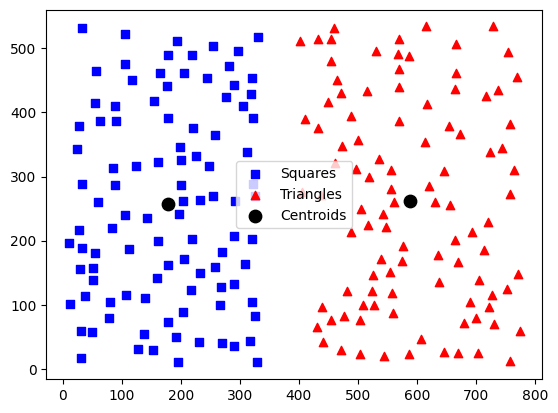

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Функция для создания изображения с белым фоном
def create_image():
    return np.ones((600, 800, 3), dtype=np.uint8) * 255

# Функция для создания квадрата
def create_square(image, color, x, y, size):
    image[y:y+size, x:x+size] = color
    return image

# Функция для создания треугольника
def create_triangle(image, color, x, y, size):
    triangle_points = np.array([[x + size // 2, y],
                                [x, y + size],
                                [x + size, y + size]])
    cv2.fillPoly(image, [triangle_points], color)
    return image

# Создание изображения с квадратами и треугольниками
image = create_image()
color_square1 = (0, 255, 0)  # Зеленый квадрат
color_triangle1 = (255, 255, 0)  # Желтый треугольник
line_color = (0, 0, 255)  # Синий цвет линии

squares = []
triangles = []

# Создание квадратов и треугольников
for i in range(100):
    size = 15  # Размер фигур
    x_square = np.random.randint(10, 350 - size - 3)  # Случайная координата X для квадрата с учетом отступа
    y_square = np.random.randint(10, 550 - size - 3)  # Случайная координата Y для квадрата с учетом отступа
    x_triangle = np.random.randint(400 + 3, 790 - size)  # Случайная координата X для треугольника
    y_triangle = np.random.randint(10, 550 - size)  # Случайная координата Y для треугольника

    # Проверяем, чтобы новый квадрат не пересекался с уже существующими квадратами
    if i > 0:
        while any(abs(x_square - sq[0]) <= size + 3 and abs(y_square - sq[1]) <= size + 3 for sq in squares):
            x_square = np.random.randint(10, 350 - size - 3)
            y_square = np.random.randint(10, 550 - size - 3)

    # Проверяем, чтобы новый треугольник не пересекался с уже существующими треугольниками
    if i > 0:
        while any(abs(x_triangle - tr[0]) <= size + 2 and abs(y_triangle - tr[1]) <= size + 2 for tr in triangles):
            x_triangle = np.random.randint(400, 790 - size - 2)
            y_triangle = np.random.randint(10, 550 - size - 2)

    squares.append((x_square, y_square))
    image = create_square(image, color_square1, x_square, y_square, size)
    triangles.append((x_triangle, y_triangle))
    image = create_triangle(image, color_triangle1, x_triangle, y_triangle, size)

# Преобразуем изображение в массив для алгоритма k-средних
data = np.array(squares + triangles, dtype=np.float32)

# Определим количество кластеров
k = 2

# Определим критерий останова
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 1.0)

# Запуск алгоритма k-средних
_, labels, centers = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Разделение квадратов и треугольников по кластерам
squares_cluster1 = data[labels.ravel() == 0]
triangles_cluster1 = data[labels.ravel() == 1]

# Отображение результатов
plt.scatter(squares_cluster1[:,0], squares_cluster1[:,1], c='b', marker='s', label='Squares')
plt.scatter(triangles_cluster1[:,0], triangles_cluster1[:,1], c='r', marker='^', label='Triangles')
plt.scatter(centers[:,0], centers[:,1], s=80, c='k', marker='o', label='Centroids')
plt.legend()
plt.show()






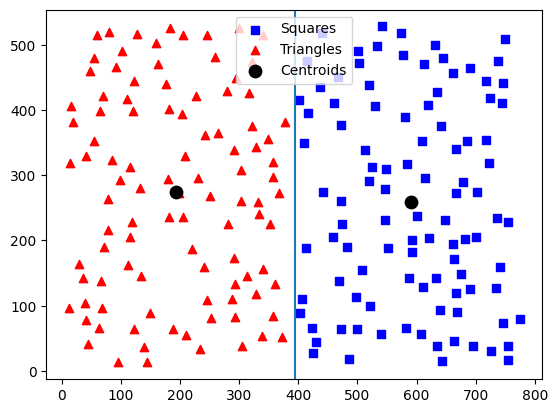

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Функция для создания изображения с белым фоном
def create_image():
    return np.ones((600, 800, 3), dtype=np.uint8) * 255

# Функция для создания квадрата
def create_square(image, color, x, y, size):
    image[y:y+size, x:x+size] = color
    return image

# Функция для создания треугольника
def create_triangle(image, color, x, y, size):
    triangle_points = np.array([[x + size // 2, y],
                                [x, y + size],
                                [x + size, y + size]])
    cv2.fillPoly(image, [triangle_points], color)
    return image

# Создание изображения с квадратами и треугольниками
image = create_image()
color_square1 = (0, 255, 0)  # Зеленый квадрат
color_triangle1 = (255, 255, 0)  # Желтый треугольник
line_color = (0, 0, 255)  # Синий цвет линии

squares = []
triangles = []

# Создание квадратов и треугольников
for i in range(100):
    size = 15  # Размер фигур
    x_square = np.random.randint(10, 400 - size - 3)  # Случайная координата X для квадрата с учетом отступа
    y_square = np.random.randint(10, 550 - size - 3)  # Случайная координата Y для квадрата с учетом отступа
    x_triangle = np.random.randint(400 + 1, 790 - size)  # Случайная координата X для треугольника
    y_triangle = np.random.randint(10, 550 - size)  # Случайная координата Y для треугольника

     # Проверяем, чтобы новый квадрат не пересекался с уже существующими квадратами
    if i > 0:
        while any(abs(x_square - sq[0]) <= size + 3 and abs(y_square - sq[1]) <= size + 3 for sq in squares):
            x_square = np.random.randint(10, 400 - size - 3)
            y_square = np.random.randint(10, 550 - size - 3)

    # Проверяем, чтобы новый треугольник не пересекался с уже существующими треугольниками
    if i > 0:
        while any(abs(x_triangle - tr[0]) <= size + 2 and abs(y_triangle - tr[1]) <= size + 2 for tr in triangles):
            x_triangle = np.random.randint(400, 790 - size - 2)
            y_triangle = np.random.randint(10, 550 - size - 2)

    squares.append((x_square, y_square))
    image = create_square(image, color_square1, x_square, y_square, size)
    triangles.append((x_triangle, y_triangle))
    image = create_triangle(image, color_triangle1, x_triangle, y_triangle, size)

# Рисуем прямую синей линию для разделения квадратов и треугольников
cv2.line(image, (395, 0), (395, 600), line_color, thickness=1)

# Преобразуем изображение в массив для алгоритма k-средних
data = np.array(squares + triangles, dtype=np.float32)

# Определим количество кластеров
k = 2

# Определим критерий останова
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 1.0)

# Запуск алгоритма k-средних
_, labels, centers = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Разделение квадратов и треугольников по кластерам
squares_cluster1 = data[labels.ravel() == 0]
triangles_cluster1 = data[labels.ravel() == 1]

# Отображение результатов
plt.scatter(squares_cluster1[:,0], squares_cluster1[:,1], c='b', marker='s', label='Squares')
plt.scatter(triangles_cluster1[:,0], triangles_cluster1[:,1], c='r', marker='^', label='Triangles')
plt.scatter(centers[:,0], centers[:,1], s=80, c='k', marker='o', label='Centroids')
plt.axvline(x=395)
plt.legend()
plt.show()



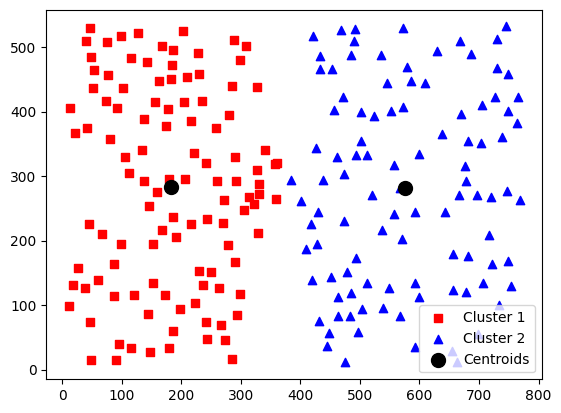

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Функция для создания изображения с белым фоном
def create_image():
    return np.ones((600, 800, 3), dtype=np.uint8) * 255

# Функция для создания квадрата
def create_square(image, color, x, y, size):
    image[y:y+size, x:x+size] = color
    return image

# Функция для создания треугольника
def create_triangle(image, color, x, y, size):
    triangle_points = np.array([[x + size // 2, y],
                                [x, y + size],
                                [x + size, y + size]])
    cv2.fillPoly(image, [triangle_points], color)
    return image

# Создание изображения
image3 = create_image()

# Определение цветов для квадратов и треугольников
color_square3 = (0, 255, 0)  # Зеленый квадрат
color_triangle3 = (255, 255, 0)  # Желтый треугольник

# Создание списков для хранения координат квадратов и треугольников
squares = []
triangles = []

# Создание квадратов и треугольников
for i in range(100):
    size = 15  # Размер фигур
    x_square = np.random.randint(10, 320 - size - 3)  # Случайная координата X для квадрата с учетом отступа
    y_square = np.random.randint(10, 550 - size - 3)  # Случайная координата Y для квадрата с учетом отступа
    x_triangle = np.random.randint(420 + 3, 790 - size)  # Случайная координата X для треугольника
    y_triangle = np.random.randint(10, 550 - size)  # Случайная координата Y для треугольника

    # Проверяем, чтобы новый квадрат не пересекался с уже существующими квадратами
    if i > 0:
        while any(abs(x_square - sq[0]) <= size + 3 and abs(y_square - sq[1]) <= size + 3 for sq in squares):
            x_square = np.random.randint(10, 350 - size - 3)
            y_square = np.random.randint(10, 550 - size - 3)

    # Проверяем, чтобы новый треугольник не пересекался с уже существующими треугольниками
    if i > 0:
        while any(abs(x_triangle - tr[0]) <= size + 2 and abs(y_triangle - tr[1]) <= size + 2 for tr in triangles):
            x_triangle = np.random.randint(400, 790 - size - 2)
            y_triangle = np.random.randint(10, 550 - size - 2)

    squares.append((x_square, y_square))
    image3 = create_square(image3, color_square1, x_square, y_square, size)
    triangles.append((x_triangle, y_triangle))
    image3 = create_triangle(image3, color_triangle1, x_triangle, y_triangle, size)

# Добавление пересекающихся фигур
for i in range(4):
    x_square = np.random.randint(300, 400)  # Случайная координата X для квадрата
    y_square = np.random.randint(200, 350)  # Случайная координата Y для квадрата
     # Проверяем, чтобы новый квадрат не пересекался с уже существующими квадратами
    if i > 0:
        while any(abs(x_square - sq[0]) <= size + 3 and abs(y_square - sq[1]) <= size + 3 for sq in squares):
            x_square = np.random.randint(300, 400 - size - 3)
            y_square = np.random.randint(200, 350 - size - 3)

    squares.append((x_square, y_square))
    image3 = create_square(image3, color_square3, x_square, y_square, size)
for i in range(7):
    x_triangle = np.random.randint(300, 400)  # Случайная координата X для треугольника
    y_triangle = np.random.randint(200, 350)  # Случайная координата Y для треугольника
     # Проверяем, чтобы новый треугольник не пересекался с уже существующими треугольниками
    if i > 0:
        while any(abs(x_triangle - tr[0]) <= size + 2 and abs(y_triangle - tr[1]) <= size + 2 for tr in triangles):
            x_triangle = np.random.randint(300, 400 - size - 2)
            y_triangle = np.random.randint(200, 350 - size - 2)

    triangles.append((x_triangle, y_triangle))
    image3 = create_triangle(image3, color_triangle3, x_triangle, y_triangle, size)

# Сохранение изображения
#cv2.imwrite('image3_mean.png', image3)

# Подготовка данных для алгоритма к-средних
data = np.float32(squares + triangles)

# Определение параметров к-средних
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 2

# Запуск алгоритма к-средних
_, labels, centers = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Разделение точек на два кластера
cluster1 = data[labels.ravel()==0]
cluster2 = data[labels.ravel()==1]

# Визуализация результатов
plt.scatter(cluster1[:,0], cluster1[:,1], c='r', marker='s', label='Cluster 1')
plt.scatter(cluster2[:,0], cluster2[:,1], c='b', marker='^', label='Cluster 2')
plt.scatter(centers[:,0], centers[:,1], s=100, c='k', marker='o', label='Centroids')
plt.legend()
plt.show()



2. На каждой картинке разместить 9 кругов (диаметр равен стороне квадрата): по 3 круга в первой области, во второй области, в пересечении областей или близко к линии разделения областей. Провести классификацию кругов методом k ближайших соседей.

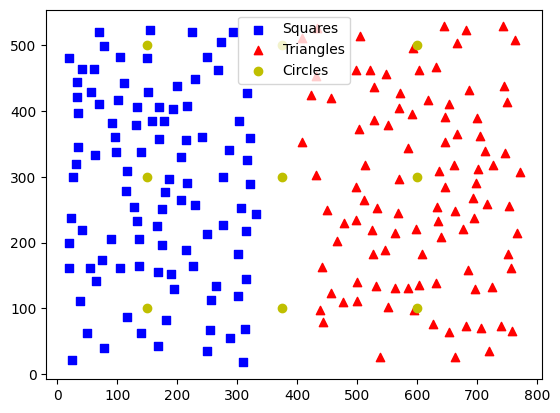

Circles 1: Result - 0, Neighbours - [0. 0. 0.]
Circles 2: Result - 1, Neighbours - [1. 0. 1.]
Circles 3: Result - 1, Neighbours - [1. 1. 1.]
Circles 4: Result - 0, Neighbours - [0. 0. 0.]
Circles 5: Result - 1, Neighbours - [0. 1. 1.]
Circles 6: Result - 1, Neighbours - [1. 1. 1.]
Circles 7: Result - 0, Neighbours - [0. 0. 0.]
Circles 8: Result - 1, Neighbours - [1. 1. 1.]
Circles 9: Result - 1, Neighbours - [1. 1. 1.]


<ipython-input-26-5ecfa53d0261>:83: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Circles {idx + 1}: Result - {int(results[0])}, Neighbours - {neighbours[0]}")#, Distance - {dist[0]}")


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Функция для создания изображения с белым фоном
def create_image():
    return np.ones((600, 800, 3), dtype=np.uint8) * 255

# Функция для создания квадрата
def create_square(image, color, x, y, size):
    image[y:y+size, x:x+size] = color
    return image

# Функция для создания треугольника
def create_triangle(image, color, x, y, size):
    triangle_points = np.array([[x + size // 2, y],
                                [x, y + size],
                                [x + size, y + size]])
    cv2.fillPoly(image, [triangle_points], color)
    return image


# Создание изображения с квадратами, треугольниками и кругами
image = create_image()
color_square1 = (0, 255, 0)  # Зеленый квадрат
color_triangle1 = (255, 255, 0)  # Желтый треугольник

squares = []
triangles = []

# Создание квадратов и треугольников
for i in range(100):
    size = 15  # Размер фигур
    x_square = np.random.randint(10, 350 - size - 3)  # Случайная координата X для квадрата с учетом отступа
    y_square = np.random.randint(10, 550 - size - 3)  # Случайная координата Y для квадрата с учетом отступа
    x_triangle = np.random.randint(400 + 3, 790 - size)  # Случайная координата X для треугольника
    y_triangle = np.random.randint(10, 550 - size)  # Случайная координата Y для треугольника

    # Проверяем, чтобы новый квадрат не пересекался с уже существующими квадратами
    if i > 0:
        while any(abs(x_square - sq[0]) <= size + 3 and abs(y_square - sq[1]) <= size + 3 for sq in squares):
            x_square = np.random.randint(10, 350 - size - 3)
            y_square = np.random.randint(10, 550 - size - 3)

    # Проверяем, чтобы новый треугольник не пересекался с уже существующими треугольниками
    if i > 0:
        while any(abs(x_triangle - tr[0]) <= size + 2 and abs(y_triangle - tr[1]) <= size + 2 for tr in triangles):
            x_triangle = np.random.randint(400, 790 - size - 2)
            y_triangle = np.random.randint(10, 550 - size - 2)

    squares.append((x_square, y_square))
    image = create_square(image, color_square1, x_square, y_square, size)
    triangles.append((x_triangle, y_triangle))
    image = create_triangle(image, color_triangle1, x_triangle, y_triangle, size)

# Feature set containing (x,y) values of squares, triangles, and circles
trainData = np.array(squares + triangles, dtype=np.float32)

# Labels each one either Square or Triangle or Circle with numbers 0, 1, and 2
responses = np.array([0] * len(squares) + [1] * len(triangles), dtype=np.float32)

# Plot squares, triangles, and circles
squares_data = trainData[responses.ravel() == 0]
triangles_data = trainData[responses.ravel() == 1]

# Генерируем координаты для новых объектов в разных углах и в середине изображения
newcomers = np.array([[150, 100], [375, 100], [600, 100],
                      [150, 300], [375, 300], [600, 300],
                      [150, 500], [375, 500], [600, 500]], dtype=np.float32)

# Отображаем новые объекты на графике вместе с обучающими данными
plt.scatter(squares_data[:,0], squares_data[:,1], c='b', marker='s', label='Squares')
plt.scatter(triangles_data[:,0], triangles_data[:,1], c='r', marker='^', label='Triangles')
plt.scatter(newcomers[:,0], newcomers[:,1], c='y', marker='o', label='Circles')
plt.legend()
plt.show()

knn = cv2.ml.KNearest_create()
knn.train(trainData, cv2.ml.ROW_SAMPLE, responses)
# Прогноз для каждого нового объекта
for idx, new_comer in enumerate(newcomers):
    ret, results, neighbours, dist = knn.findNearest(new_comer.reshape(1, -1), 3)
    print(f"Circles {idx + 1}: Result - {int(results[0])}, Neighbours - {neighbours[0]}")#, Distance - {dist[0]}")


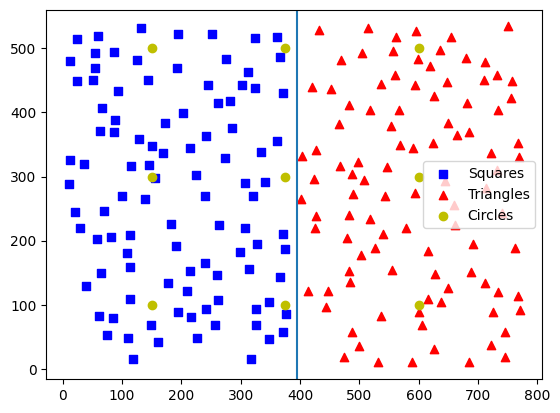

Circles 1: Result - 0, Neighbours - [0. 0. 0.]
Circles 2: Result - 0, Neighbours - [0. 0. 0.]
Circles 3: Result - 1, Neighbours - [1. 1. 1.]
Circles 4: Result - 0, Neighbours - [0. 0. 0.]
Circles 5: Result - 1, Neighbours - [0. 1. 1.]
Circles 6: Result - 1, Neighbours - [1. 1. 1.]
Circles 7: Result - 0, Neighbours - [0. 0. 0.]
Circles 8: Result - 0, Neighbours - [0. 0. 0.]
Circles 9: Result - 1, Neighbours - [1. 1. 1.]


<ipython-input-33-c65482f93b94>:84: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Circles {idx + 1}: Result - {int(results[0])}, Neighbours - {neighbours[0]}")#, Distance - {dist[0]}")


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Функция для создания изображения с белым фоном
def create_image():
    return np.ones((600, 800, 3), dtype=np.uint8) * 255

# Функция для создания квадрата
def create_square(image, color, x, y, size):
    image[y:y+size, x:x+size] = color
    return image

# Функция для создания треугольника
def create_triangle(image, color, x, y, size):
    triangle_points = np.array([[x + size // 2, y],
                                [x, y + size],
                                [x + size, y + size]])
    cv2.fillPoly(image, [triangle_points], color)
    return image


# Создание изображения с квадратами, треугольниками и кругами
image = create_image()
color_square1 = (0, 255, 0)  # Зеленый квадрат
color_triangle1 = (255, 255, 0)  # Желтый треугольник

squares = []
triangles = []

# Создание квадратов и треугольников
for i in range(100):
    size = 15  # Размер фигур
    x_square = np.random.randint(10, 400 - size - 3)  # Случайная координата X для квадрата с учетом отступа
    y_square = np.random.randint(10, 550 - size - 3)  # Случайная координата Y для квадрата с учетом отступа
    x_triangle = np.random.randint(399 + 3, 790 - size)  # Случайная координата X для треугольника
    y_triangle = np.random.randint(10, 550 - size)  # Случайная координата Y для треугольника

    # Проверяем, чтобы новый квадрат не пересекался с уже существующими квадратами
    if i > 0:
        while any(abs(x_square - sq[0]) <= size + 3 and abs(y_square - sq[1]) <= size + 3 for sq in squares):
            x_square = np.random.randint(10, 400 - size - 3)
            y_square = np.random.randint(10, 550 - size - 3)

    # Проверяем, чтобы новый треугольник не пересекался с уже существующими треугольниками
    if i > 0:
        while any(abs(x_triangle - tr[0]) <= size + 2 and abs(y_triangle - tr[1]) <= size + 2 for tr in triangles):
            x_triangle = np.random.randint(399, 790 - size - 2)
            y_triangle = np.random.randint(10, 550 - size - 2)

    squares.append((x_square, y_square))
    image = create_square(image, color_square1, x_square, y_square, size)
    triangles.append((x_triangle, y_triangle))
    image = create_triangle(image, color_triangle1, x_triangle, y_triangle, size)

# Feature set containing (x,y) values of squares, triangles, and circles
trainData = np.array(squares + triangles, dtype=np.float32)

# Labels each one either Square or Triangle or Circle with numbers 0, 1, and 2
responses = np.array([0] * len(squares) + [1] * len(triangles), dtype=np.float32)

# Plot squares, triangles, and circles
squares_data = trainData[responses.ravel() == 0]
triangles_data = trainData[responses.ravel() == 1]

# Генерируем координаты для новых объектов в разных углах и в середине изображения
newcomers = np.array([[150, 100], [375, 100], [600, 100],
                      [150, 300], [375, 300], [600, 300],
                      [150, 500], [375, 500], [600, 500]], dtype=np.float32)

# Отображаем новые объекты на графике вместе с обучающими данными
plt.scatter(squares_data[:,0], squares_data[:,1], c='b', marker='s', label='Squares')
plt.scatter(triangles_data[:,0], triangles_data[:,1], c='r', marker='^', label='Triangles')
plt.scatter(newcomers[:,0], newcomers[:,1], c='y', marker='o', label='Circles')
plt.axvline(x=395)
plt.legend()
plt.show()

knn = cv2.ml.KNearest_create()
knn.train(trainData, cv2.ml.ROW_SAMPLE, responses)
# Прогноз для каждого нового объекта
for idx, new_comer in enumerate(newcomers):
    ret, results, neighbours, dist = knn.findNearest(new_comer.reshape(1, -1), 3)
    print(f"Circles {idx + 1}: Result - {int(results[0])}, Neighbours - {neighbours[0]}")#, Distance - {dist[0]}")


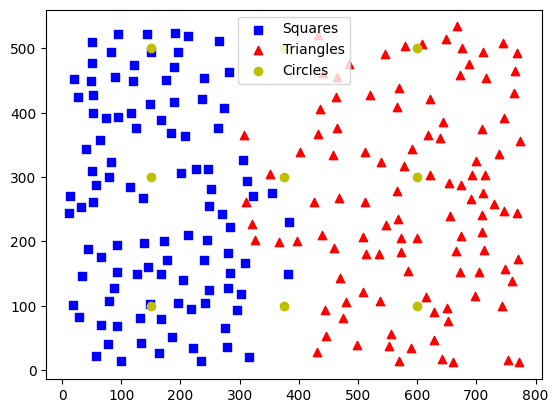

Circles 1: Result - 0, Neighbours - [0. 0. 0.]
Circles 2: Result - 0, Neighbours - [0. 1. 0.]
Circles 3: Result - 1, Neighbours - [1. 1. 1.]
Circles 4: Result - 0, Neighbours - [0. 0. 0.]
Circles 5: Result - 1, Neighbours - [1. 0. 1.]
Circles 6: Result - 1, Neighbours - [1. 1. 1.]
Circles 7: Result - 0, Neighbours - [0. 0. 0.]
Circles 8: Result - 1, Neighbours - [1. 1. 1.]
Circles 9: Result - 1, Neighbours - [1. 1. 1.]


<ipython-input-27-c03189a5f404>:108: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Circles {idx + 1}: Result - {int(results[0])}, Neighbours - {neighbours[0]}")#, Distance - {dist[0]}")


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Создание изображения с белым фоном
def create_image():
    return np.ones((600, 800, 3)) * 255

# Функция для создания квадрата
def create_square(image, color, x, y, size):
    image[y:y+size, x:x+size] = color
    return image

# Функция для создания треугольника
def create_triangle(image, color, x, y, size):
    triangle_points = np.array([[x + size // 2, y],
                                [x, y + size],
                                [x + size, y + size]])
    cv2.fillPoly(image, [triangle_points], color)
    return image


# Третье изображение
image = create_image()
color_square = (0, 255, 0)  # Зеленый квадрат
color_triangle = (255, 255, 0)  # Желтый треугольник


squares = []
triangles = []

# Создание квадратов и треугольников
for i in range(100):
    size = 15  # Размер фигур
    x_square = np.random.randint(10, 320 - size - 3)  # Случайная координата X для квадрата с учетом отступа
    y_square = np.random.randint(10, 550 - size - 3)  # Случайная координата Y для квадрата с учетом отступа
    x_triangle = np.random.randint(420 + 3, 790 - size)  # Случайная координата X для треугольника
    y_triangle = np.random.randint(10, 550 - size)  # Случайная координата Y для треугольника

    # Проверяем, чтобы новый квадрат не пересекался с уже существующими квадратами
    if i > 0:
        while any(abs(x_square - sq[0]) <= size + 3 and abs(y_square - sq[1]) <= size + 3 for sq in squares):
            x_square = np.random.randint(10, 350 - size - 3)
            y_square = np.random.randint(10, 550 - size - 3)

    # Проверяем, чтобы новый треугольник не пересекался с уже существующими треугольниками
    if i > 0:
        while any(abs(x_triangle - tr[0]) <= size + 2 and abs(y_triangle - tr[1]) <= size + 2 for tr in triangles):
            x_triangle = np.random.randint(400, 790 - size - 2)
            y_triangle = np.random.randint(10, 550 - size - 2)

    squares.append((x_square, y_square))
    image = create_square(image, color_square, x_square, y_square, size)
    triangles.append((x_triangle, y_triangle))
    image = create_triangle(image, color_triangle, x_triangle, y_triangle, size)

# Добавление пересекающихся фигур
for i in range(4):
    x_square = np.random.randint(300, 400)  # Случайная координата X для квадрата
    y_square = np.random.randint(100, 350)  # Случайная координата Y для квадрата
     # Проверяем, чтобы новый квадрат не пересекался с уже существующими квадратами
    if i > 0:
        while any(abs(x_square - sq[0]) <= size + 3 and abs(y_square - sq[1]) <= size + 3 for sq in squares):
            x_square = np.random.randint(300, 400 - size - 3)
            y_square = np.random.randint(200, 350 - size - 3)

    squares.append((x_square, y_square))
    image = create_square(image, color_square, x_square, y_square, size)
for i in range(7):
    x_triangle = np.random.randint(300, 400)  # Случайная координата X для треугольника
    y_triangle = np.random.randint(100, 400)  # Случайная координата Y для треугольника
     # Проверяем, чтобы новый треугольник не пересекался с уже существующими треугольниками
    if i > 0:
        while any(abs(x_triangle - tr[0]) <= size + 2 and abs(y_triangle - tr[1]) <= size + 2 for tr in triangles):
            x_triangle = np.random.randint(300, 400 - size - 2)
            y_triangle = np.random.randint(200, 350 - size - 2)

    triangles.append((x_triangle, y_triangle))
    image = create_triangle(image, color_triangle, x_triangle, y_triangle, size)

# Feature set containing (x,y) values of squares, triangles, and circles
trainData = np.array(squares + triangles, dtype=np.float32)

# Labels each one either Square or Triangle or Circle with numbers 0, 1, and 2
responses = np.array([0] * len(squares) + [1] * len(triangles), dtype=np.float32)

# Plot squares, triangles, and circles
squares_data = trainData[responses.ravel() == 0]
triangles_data = trainData[responses.ravel() == 1]

# Генерируем координаты для новых объектов в разных углах и в середине изображения
newcomers = np.array([[150, 100], [375, 100], [600, 100],
                      [150, 300], [375, 300], [600, 300],
                      [150, 500], [375, 500], [600, 500]], dtype=np.float32)

# Отображаем новые объекты на графике вместе с обучающими данными
plt.scatter(squares_data[:,0], squares_data[:,1], c='b', marker='s', label='Squares')
plt.scatter(triangles_data[:,0], triangles_data[:,1], c='r', marker='^', label='Triangles')
plt.scatter(newcomers[:,0], newcomers[:,1], c='y', marker='o', label='Circles')
plt.legend()
plt.show()

knn = cv2.ml.KNearest_create()
knn.train(trainData, cv2.ml.ROW_SAMPLE, responses)
# Прогноз для каждого нового объекта
for idx, new_comer in enumerate(newcomers):
    ret, results, neighbours, dist = knn.findNearest(new_comer.reshape(1, -1), 3)
    print(f"Circles {idx + 1}: Result - {int(results[0])}, Neighbours - {neighbours[0]}")#, Distance - {dist[0]}")


# Лабораторная работа № 11.

In [ ]:
pip install pillow

SyntaxError: invalid syntax (<ipython-input-14-c91da7feb037>, line 1)

In [ ]:
pip install keras

In [ ]:
pip install torchvision

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [ ]:
pip install tensorflow

In [ ]:
pip install sklearn-model

Подготовка
1. Самостоятельно выбранными средствами (opencv, pillow (PIL), …) сгенерировать по 820 картинок размером 100х100 пикселей (px) для каждой из цифр: 0, 1, 3, 8 следующим образом (800 – тренировочная выборка, 20 – тестовая выборка № 1):
    * • фон картинки белый,
    * • цифра: ширина – 20 px, высота – 50 px, цвет линии – черный, цифра целиком помещается в картинку, цифра находится в случайном месте на картинке,
    * • на изображении цифра расположена так, что ее вертикальная ось параллельна оси ординат (вертикальное положение) или оси абсцисс (горизонтальное положение),
    * • тренировочная выборка содержит 400 изображений каждой цифры в горизонтальном положении и 400 изображений каждой цифры в вертикальном положении,
    * • тестовая выборка содержит 10 изображений каждой цифры в горизонтальном положении и 10 изображений каждой цифры в вертикальном положении,



In [ ]:
import os
import random
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import cv2

nb_images = 600  # Количество изображений каждой цифры
# Создание папок для тренировочной и тестовой выборок
train_dir = f'train_data_{nb_images}'
#test_dir = 'test_data_1'
os.makedirs(train_dir, exist_ok=True)
#os.makedirs(test_dir, exist_ok=True)

# Функция для генерации изображений
def generate_images(digits, num_images, directory):
    for digit in digits:
        for i in range(num_images):
            # Создание белого фона
            img = Image.new('L', (100, 100), color='white')
            draw = ImageDraw.Draw(img)

            # Создание изображения цифры
            digit_img = Image.new('L', (20, 50), color='white')
            digit_draw = ImageDraw.Draw(digit_img)
            digit_draw.text((0, 0), str(digit), fill='black')

            # Случайное местоположение цифры
            x = random.randint(0, 80)
            y = random.randint(0, 50)
            img.paste(digit_img, (x, y))

            # Поворот изображения (вертикально или горизонтально)
            if i % 2:
                img = img.transpose(Image.ROTATE_90)

            # Преобразование изображения PIL в изображение OpenCV
            cv_img = cv2.cvtColor(np.array(img), cv2.COLOR_GRAY2BGR)

            # Сохранение изображения
            cv2.imwrite(os.path.join(directory, f'{digit}_{i}.png'), cv_img)

# Генерация изображений для тестовой выборки
#generate_images([0, 1, 3, 8], 20, test_dir)

# Генерация изображений для тренировочной выборки
generate_images([0, 1, 3, 8], nb_images, train_dir)

In [ ]:
import os
import random
import numpy as np
from PIL import Image, ImageDraw
import cv2

test_dir = 'test_data_1'
os.makedirs(test_dir, exist_ok=True)

def create_directory(dir_name):
    if os.path.exists(dir_name):
        shutil.rmtree(dir_name)
    os.makedirs(dir_name, exist_ok=True)
    os.makedirs(os.path.join(dir_name, "0"))
    os.makedirs(os.path.join(dir_name, "1"))
    os.makedirs(os.path.join(dir_name, "3"))
    os.makedirs(os.path.join(dir_name, "8"))

create_directory(test_dir)

# Функция для генерации изображений
def generate_images(digits, num_images, directory):
    #for digit in digits:
        for i in range(num_images):
            # Создание белого фона
            img = Image.new('L', (100, 100), color='white')
            draw = ImageDraw.Draw(img)

            # Создание изображения цифры
            digit_img = Image.new('L', (20, 50), color='white')
            digit_draw = ImageDraw.Draw(digit_img)
            digit_draw.text((0, 0), str(digit), fill='black')

            # Случайное местоположение цифры
            x = random.randint(0, 80)
            y = random.randint(0, 50)
            img.paste(digit_img, (x, y))

            # Поворот изображения (вертикально или горизонтально)
            if i % 2:
                img = img.transpose(Image.ROTATE_90)

            # Преобразование изображения PIL в изображение OpenCV
            cv_img = cv2.cvtColor(np.array(img), cv2.COLOR_GRAY2BGR)

            # Сохранение изображения
            cv2.imwrite(os.path.join(f'{directory}', f'{digit}_{i}.png'), cv_img)

# Генерация изображений для тестовой выборки
for digit in [0, 1, 3, 8]:
  generate_images([0, 1, 3, 8], 20, f'{test_dir}/{digit}')


2. Создать новые тестовые картинки, полученные путем добавления черных пикселей (шум) в случайно выбранные места сгенерированных тестовых картинок:
    * a) 20 px (тестовая выборка № 2),
    * b) 50 px (тестовая выборка № 3),
    * c) 100 px (тестовая выборка № 4),
    * d) 200 px (тестовая выборка № 5).

In [ ]:
import random
from PIL import Image, ImageDraw
import os

# Создаем папку для хранения изображений, если она не существует
test_dir = 'test_data_1'
test_dir2 = "test_data_2"
test_dir3 = "test_data_3"
test_dir4 = "test_data_4"
test_dir5 = "test_data_5"
os.makedirs(test_dir2, exist_ok=True)
os.makedirs(test_dir3, exist_ok=True)
os.makedirs(test_dir4, exist_ok=True)
os.makedirs(test_dir5, exist_ok=True)


def create_directory(dir_name):
    if os.path.exists(dir_name):
        shutil.rmtree(dir_name)
    os.makedirs(dir_name, exist_ok=True)
    os.makedirs(os.path.join(dir_name, "0"))
    os.makedirs(os.path.join(dir_name, "1"))
    os.makedirs(os.path.join(dir_name, "3"))
    os.makedirs(os.path.join(dir_name, "8"))

create_directory(test_dir2)
create_directory(test_dir3)
create_directory(test_dir4)
create_directory(test_dir5)



# Функция для добавления шума в изображение
def add_noise_to_image(image, noise_pixels):
    width, height = image.size
    draw = ImageDraw.Draw(image)
    for _ in range(noise_pixels):
        x = random.randint(0, width - 1)
        y = random.randint(0, height - 1)
        draw.point((x, y), fill='black')

# Генерируем изображения для каждой цифры в тестовой выборке с добавлением шума
for digit in [0, 1, 3, 8]:
    for i in range(20):
        # Горизонтальные изображения с цифрой
        img_horizontal = Image.open(f'{test_dir}/{digit}/{digit}_{i}.png')
        add_noise_to_image(img_horizontal, 20)  # Добавляем 20 черных пикселей
        img_horizontal.save(f"{test_dir2}/{digit}/{digit}_{i}.png")
        add_noise_to_image(img_horizontal, 50)  # Добавляем 50 черных пикселей
        img_horizontal.save(f"{test_dir3}/{digit}/{digit}_{i}.png")
        add_noise_to_image(img_horizontal, 100)  # Добавляем 100 черных пикселей
        img_horizontal.save(f"{test_dir4}/{digit}/{digit}_{i}.png")
        add_noise_to_image(img_horizontal, 200)  # Добавляем 200 черных пикселей
        img_horizontal.save(f"{test_dir5}/{digit}/{digit}_{i}.png")


In [ ]:
import shutil
import os
import numpy as np
from sklearn.model_selection import train_test_split

# Количество элементов данных в одном классе
nb_images = 600  # Количество изображений каждой цифры
# Каталог с набором данных
data_dir = f"train_data_{nb_images}"
# Каталог с данными для обучения
train_dir = f"train_data_{nb_images}/train"
# Каталог с данными для проверки
val_dir = f"train_data_{nb_images}/val"
# Каталог с данными для проверки
#val_dir = "test_data_1"
# Часть набора данных для проверки
val_data_portion = 0.15

def create_directory(dir_name):
    if os.path.exists(dir_name):
        shutil.rmtree(dir_name)
    os.makedirs(dir_name)
    os.makedirs(os.path.join(dir_name, "0"))
    os.makedirs(os.path.join(dir_name, "1"))
    os.makedirs(os.path.join(dir_name, "3"))
    os.makedirs(os.path.join(dir_name, "8"))

create_directory(train_dir)
create_directory(val_dir)
#create_directory(test_dir)


# Перемещаем изображения для обучения в соответствующие каталоги
for digit in [0, 1, 3, 8]:
    images = [f"{digit}_{i}.png" for i in range(nb_images)]
    train_images, val_images = train_test_split(images, test_size=val_data_portion, random_state=42)

    for img in train_images:
        src = os.path.join(data_dir, img)
        dest = os.path.join(f"train_data_{nb_images}/train/{digit}", img)
        shutil.move(src, dest)

    for img in val_images:
        src = os.path.join(data_dir, img)
        dest = os.path.join(f"train_data_{nb_images}/val/{digit}", img)
        shutil.move(src, dest)

'''   images = [f"{digit}_{i}.png" for i in range(20)]

    for img in images:
        src = os.path.join(data_dir, img)
        dest = os.path.join(f"test_data_1/{digit}", img)
        shutil.move(src, dest)'''




'   images = [f"{digit}_{i}.png" for i in range(20)]\n\n    for img in images:\n        src = os.path.join(data_dir, img)\n        dest = os.path.join(f"test_data_1/{digit}", img)\n        shutil.move(src, dest)'

Задача

Не используя предобученные модели (сети), модифицировать скрипт задачи «Dogs vs Cats» (из презентации лекции) или написать свою нейронную сеть на keras или torch такую, что:
  * 1) На вход подается тренировочное множество: по 800 картинок каждой цифры.
  * 2) Из тренировочного множества выделяется часть картинок (10–20%), на валидационное множество, в котором должны присутствовать цифры в вертикальном и горизонтальном положении.
  * 3) Протестировать адекватность модели на всех тестовых выборках № 1, № 2, № 3, № 4, № 5, фиксируя при этом точность (accuracy) классификации.
  * 4) Повторить пункты 1)–3), изменив объем тренировочной выборки до 600, 400, 200, 100 картинок каждой цифры.

Результаты оформить в виде таблицы со столбцами: размер тренировочной выборки, количество шумовых пикселей, точность (accuracy) классификации. Полученные наборы изображений сохранить для следующих лабораторных работ.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from time import time
import numpy as np

t1 = time()
nb_images = 100  # Количество изображений каждой цифры

# Каталог с данными для обучения
train_dir = f"train_data_{nb_images}/train"
# Каталог с данными для проверки
val_dir = f"train_data_{nb_images}/val"
# Каталог с данными для тестирования
test_dir = "test_data_5"

# Размеры изображения
img_width, img_height = 100, 100
# Размерность тензора на основе изображения для входных данных в нейронную сеть
input_shape = (img_width, img_height, 3)
# Количество эпох
epochs = 30
# Размер мини-выборки
batch_size = 16
# Количество изображений для обучения
nb_train_samples = nb_images * 4
# Количество изображений для проверки (10% от обучающих данных)
nb_validation_samples = int(nb_train_samples / 100 * 10)
# Количество изображений для тестирования
nb_test_samples = 80

# Создаем сверточную нейронную сеть.
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4))  # Количества нейронов 4
model.add(Activation('softmax'))
print(model.summary())

# Компилируем нейронную сеть
model.compile(loss='categorical_crossentropy',  # Функция потерь
              optimizer='adam',
              metrics=['accuracy'])

# Генератор изображений создается на основе класса ImageDataGenerator.
datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.15)

# Генератор данных для обучения на основе изображений из каталога
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

# Генератор данных для валидации на основе изображений из каталога
val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

# Генератор данных для тестирования на основе изображений из каталога
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Обучаем модель с использованием генераторов
model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator)

# Подготовка тестовых данных для оценки
test_data = []
test_labels = []

for i in range(nb_test_samples // batch_size):
    data, labels = test_generator.next()
    test_data.append(data)
    test_labels.append(labels)

test_data = np.concatenate(test_data)
test_labels = np.concatenate(test_labels)

# Преобразование меток классов в one-hot encoding
test_labels_one_hot = to_categorical(np.argmax(test_labels, axis=1), num_classes=4)

# Оцениваем качество работы сети с помощью генератора
scores = model.evaluate(test_data, test_labels_one_hot)
print("Аккуратность на тестовых данных: %.2f%%" % (scores[1] * 100))
print(time() - t1)



Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_81 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 activation_135 (Activation  (None, 98, 98, 32)        0         
 )                                                               
                                                                 
 max_pooling2d_81 (MaxPooli  (None, 49, 49, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_82 (Conv2D)          (None, 47, 47, 32)        9248      
                                                                 
 activation_136 (Activation  (None, 47, 47, 32)        0         
 )                                                               
                                                     

размер train_data | количество шумовых пикселей | точность (accuracy) классификации

---
         800       |   test_data_1(без шумов)   | 95.00%; :796.2992551326752
---
         800       |   test_data_2(20 шумов)    | 96.25%; 857.0830814838409           
---
         800       |   test_data_3(50 шумов)    | 32.50%; 875.6735148429871
---
         800       |   test_data_4(100 шумов)   | 30.00%; 866.6462063789368
---
         800       |   test_data_5(200 шумов)   | 25.00%; 866.480043888092
---
         600       |   test_data_1(без шумов)   | 95.00%; 630.4958865642548       

---
         600       |   test_data_2(20 шумов)    | 96.25%; 649.1023623943329                        

---
         600       |   test_data_3(50 шумов)    | 96.25%; 611.2074837684631
---
         600       |   test_data_4(100 шумов)   | 85.00%; 609.481246471405
---
         600       |   test_data_5(200 шумов)   | 25.00%; 650.9924547672272

---
         400       |   test_data_1(без шумов)   | 97.50%; 417.8075866699219
        

---
         400       |   test_data_2(20 шумов)    | 97.50%; 405.44154596328735
                         
---
         400       |   test_data_3(50 шумов)    | 95.00%; 432.68145966529846
  
---
         400       |   test_data_4(100 шумов)   | 63.75%; 405.8169584274292

---
         400       |   test_data_5(200 шумов)   | 42.50%; 422.251916885376
---
         200       |   test_data_1(без шумов)   | 78.75%; 207.50445675849915      
---
         200       |   test_data_2(20 шумов)    | 55.00%; 221.477276802063
                        

---
         200       |   test_data_3(50 шумов)    | 32.50%; 217.59812545776367  
---
         200       |   test_data_4(100 шумов)   | 95.00%; 212.3010232448578
---
         200       |   test_data_5(200 шумов)   | 25.00%; 211.47030019760132


---
         100       |   test_data_1(без шумов)   | 41.25%; 111.35995864868164

---
         100       |   test_data_2(20 шумов)    | 28.75%; 114.68079733848572         

---
         100       |   test_data_3(50 шумов)    | 25.00%; 113.48612570762634  
---
         100       |   test_data_4(100 шумов)   | 25.00%; 108.83681321144104

---
         100       |   test_data_5(200 шумов)   | 25.00%; 109.44480419158936



# Лабораторная работа № 12.

1. Из наборов изображений, которые полученные в лабораторной работе № 11, выбрать по 135 изображений каждой цифры без шума: a)100/15/20 для обучающей/валидационной/тестовой выборок). В каждой выборке должно содержаться равное количество изображений каждой цифры в вертикальном и горизонтальном положении соответственно.


In [ ]:
import os
import random
import shutil
import numpy as np
from PIL import Image, ImageDraw
import cv2

nb_images = 700  # Количество изображений каждой цифры
# Создание папок для тренировочной и тестовой выборок
train_dir = f'train_data_{nb_images}/train'
os.makedirs(train_dir, exist_ok=True)

def create_directory(dir_name):
    if os.path.exists(dir_name):
        shutil.rmtree(dir_name)
    os.makedirs(dir_name, exist_ok=True)
    os.makedirs(os.path.join(dir_name, "0"))
    os.makedirs(os.path.join(dir_name, "1"))
    os.makedirs(os.path.join(dir_name, "3"))
    os.makedirs(os.path.join(dir_name, "8"))

create_directory(train_dir)

# Функция для генерации изображений
def generate_images(digits, num_images, directory):
    #for digit in digits:
        for i in range(num_images):
            # Создание белого фона
            img = Image.new('L', (100, 100), color='white')
            draw = ImageDraw.Draw(img)

            # Создание изображения цифры
            digit_img = Image.new('L', (20, 50), color='white')
            digit_draw = ImageDraw.Draw(digit_img)
            digit_draw.text((0, 0), str(digit), fill='black')

            # Случайное местоположение цифры
            x = random.randint(0, 80)
            y = random.randint(0, 50)
            img.paste(digit_img, (x, y))

            # Поворот изображения (вертикально или горизонтально)
            if i % 2:
                img = img.transpose(Image.ROTATE_90)

            # Преобразование изображения PIL в изображение OpenCV
            cv_img = cv2.cvtColor(np.array(img), cv2.COLOR_GRAY2BGR)

            # Сохранение изображения
            cv2.imwrite(os.path.join(f'{directory}', f'{digit}_{i}.png'), cv_img)

# Генерация изображений для тренировочной выборки
for digit in [0, 1, 3, 8]:
  generate_images([0, 1, 3, 8], nb_images, f'{train_dir}/{digit}')

In [ ]:
import os
import random
import shutil
import numpy as np
from PIL import Image, ImageDraw
import cv2

test_dir = 'test_data_1'
os.makedirs(test_dir, exist_ok=True)

def create_directory(dir_name):
    if os.path.exists(dir_name):
        shutil.rmtree(dir_name)
    os.makedirs(dir_name, exist_ok=True)
    os.makedirs(os.path.join(dir_name, "0"))
    os.makedirs(os.path.join(dir_name, "1"))
    os.makedirs(os.path.join(dir_name, "3"))
    os.makedirs(os.path.join(dir_name, "8"))

create_directory(test_dir)

# Функция для генерации изображений
def generate_images(digits, num_images, directory):
    #for digit in digits:
        for i in range(num_images):
            # Создание белого фона
            img = Image.new('L', (100, 100), color='white')
            draw = ImageDraw.Draw(img)

            # Создание изображения цифры
            digit_img = Image.new('L', (20, 50), color='white')
            digit_draw = ImageDraw.Draw(digit_img)
            digit_draw.text((0, 0), str(digit), fill='black')

            # Случайное местоположение цифры
            x = random.randint(0, 80)
            y = random.randint(0, 50)
            img.paste(digit_img, (x, y))

            # Поворот изображения (вертикально или горизонтально)
            if i % 2:
                img = img.transpose(Image.ROTATE_90)

            # Преобразование изображения PIL в изображение OpenCV
            cv_img = cv2.cvtColor(np.array(img), cv2.COLOR_GRAY2BGR)

            # Сохранение изображения
            cv2.imwrite(os.path.join(f'{directory}', f'{digit}_{i}.png'), cv_img)

# Генерация изображений для тестовой выборки
for digit in [0, 1, 3, 8]:
  generate_images([0, 1, 3, 8], 20, f'{test_dir}/{digit}')

In [ ]:
import os
import random
import shutil
import numpy as np
from PIL import Image, ImageDraw
import cv2

nb_images = 700  # Количество изображений каждой цифры
val_nb_images = 100  # Количество изображений каждой цифры
# Создание папок для тренировочной и тестовой выборок
val_dir = f'train_data_{nb_images}/val'
os.makedirs(val_dir, exist_ok=True)

def create_directory(dir_name):
    if os.path.exists(dir_name):
        shutil.rmtree(dir_name)
    os.makedirs(dir_name, exist_ok=True)
    os.makedirs(os.path.join(dir_name, "0"))
    os.makedirs(os.path.join(dir_name, "1"))
    os.makedirs(os.path.join(dir_name, "3"))
    os.makedirs(os.path.join(dir_name, "8"))

create_directory(val_dir)

# Функция для генерации изображений
def generate_images(digits, num_images, directory):
    #for digit in digits:
        for i in range(num_images):
            # Создание белого фона
            img = Image.new('L', (100, 100), color='white')
            draw = ImageDraw.Draw(img)

            # Создание изображения цифры
            digit_img = Image.new('L', (20, 50), color='white')
            digit_draw = ImageDraw.Draw(digit_img)
            digit_draw.text((0, 0), str(digit), fill='black')

            # Случайное местоположение цифры
            x = random.randint(0, 80)
            y = random.randint(0, 50)
            img.paste(digit_img, (x, y))

            # Поворот изображения (вертикально или горизонтально)
            if i % 2:
                img = img.transpose(Image.ROTATE_90)

            # Преобразование изображения PIL в изображение OpenCV
            cv_img = cv2.cvtColor(np.array(img), cv2.COLOR_GRAY2BGR)

            # Сохранение изображения
            cv2.imwrite(os.path.join(f'{directory}', f'{digit}_{i}.png'), cv_img)

# Генерация изображений для тренировочной выборки
for digit in [0, 1, 3, 8]:
  generate_images([0, 1, 3, 8], val_nb_images, f'{val_dir}/{digit}')

2. Используя keras или torch и по очереди каждую из сверточных нейронных сетей https://keras.io/api/applications/ : Xception, ResNet152V2, InceptionResNetV2, DenseNet201, NASNetLarge дообучить сеть на этих картинках и вывести результаты классификации на тестовом множестве.
3. Повторить пункт 2, изменив размеры обучающей/валидационной/тестовой выборок для каждой цифры на:
    * b) 250/30/20,
    * c) 400/60/20,
    * d) 700/100/20.



In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import Xception, ResNet152V2, InceptionResNetV2, DenseNet201, NASNetLarge
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report

# Установка параметров
img_height, img_width = 100, 100  # Размер изображений для моделей
num_classes = 4
batch_size = 32

# Пути к данным
nb_images = 700  # Количество изображений в каждой категории для обучения
train_dir = f"train_data_{nb_images}/train"
val_dir = f"train_data_{nb_images}/val"
test_dir = "test_data_1"

# Генераторы данных
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    #class_mode='categorical'
    shuffle=False)

# Создание и обучение моделей
models = [Xception, ResNet152V2, InceptionResNetV2, DenseNet201, NASNetLarge]

for model_type in models:
    base_model = model_type(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    for layer in base_model.layers:
        layer.trainable = False

    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    print(f"\nTraining {model_type.__name__}...")
    model.fit(train_generator, epochs=15, validation_data=val_generator)

    # Оценка модели на тестовом наборе данных
    print(f"\nEvaluating {model_type.__name__} on test data...")
    test_loss, test_acc = model.evaluate(test_generator)
    print(f"Test Accuracy: {test_acc}")

    # Предсказания модели
    predictions = model.predict(test_generator)
    y_pred = np.argmax(predictions, axis=1)
    y_true = test_generator.classes

    # Матрица ошибок
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

    # Метрики precision, recall и f1-score
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=test_generator.class_indices))
#weights='imagenet', include_top=False,  x = base_model.output for layer in base_model.layers:
        #layer.trainable = False activation='softmax'

# и для увелечения скорости работы нейронки поменять в среде выполнения на T4 GPU

Found 2800 images belonging to 4 classes.
Found 400 images belonging to 4 classes.
Found 80 images belonging to 4 classes.

Training Xception...
Epoch 1/15
88/88 [==============================] - 13s 81ms/step - loss: 0.8346 - accuracy: 0.6507 - val_loss: 0.5944 - val_accuracy: 0.7375
Epoch 2/15
88/88 [==============================] - 3s 36ms/step - loss: 0.5170 - accuracy: 0.7839 - val_loss: 0.4700 - val_accuracy: 0.7875
Epoch 3/15
88/88 [==============================] - 3s 36ms/step - loss: 0.4144 - accuracy: 0.8304 - val_loss: 0.4114 - val_accuracy: 0.8325
Epoch 4/15
88/88 [==============================] - 3s 38ms/step - loss: 0.3739 - accuracy: 0.8407 - val_loss: 0.3730 - val_accuracy: 0.8300
Epoch 5/15
88/88 [==============================] - 3s 37ms/step - loss: 0.3419 - accuracy: 0.8536 - val_loss: 0.4191 - val_accuracy: 0.7950
Epoch 6/15
88/88 [==============================] - 3s 36ms/step - loss: 0.3175 - accuracy: 0.8621 - val_loss: 0.3434 - val_accuracy: 0.8275
Epoch 7/

KeyboardInterrupt: 

4. Полученные результаты оформить в виде таблицы со столбцами: название сети, размеры выборок, матрица ошибок (confusion matrix), метрики: точность (precision), полнота (recall), f1-метрика. Выбрать и зафиксировать для следующей лабораторной работы 3 сети, которые обеспечивают набольшее значение метрики f1.

размеры выборок| матрица ошибок| точность| полнота| f1-метрика

https://docs.google.com/spreadsheets/d/1lsj3yn1qK427LrxwvERSWakl_TNn2VCLkJEE-EvI-hM/edit?usp=sharing